<a href="https://colab.research.google.com/github/nagae/ICL_B_2021/blob/main/global_minimum_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

世界編のデータとして 
https://covid.ourworldindata.org/data/owid-covid-data.csv
を使って全国の陽性数と死亡数のグラフを作成し， PDF形式とPNG形式のそれぞれで保存するサンプル．

In [59]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime
# CSVをデータフレームに読み込む（ちょっと重い）
global_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
# 年-月-日の文字列で記載されている年月日を datetime 型に変更
global_df["date"]=pd.to_datetime(global_df["date"], format="%Y-%m-%d")
# 県別でも扱ったマルチインデックスとして整形
global_df = global_df.set_index(["location", "date"])
# 国名でない地域名
area_list = ['World', 'Asia', 'Europe', 'North America', 'European Union', 'South America', 'Africa']
global_df = global_df.drop(index=area_list) # 地域名を取り除く(取り除きたくない場合はこの行をコメントアウト)

['United States', 'Brazil', 'India', 'Mexico', 'United Kingdom', 'Italy', 'Russia', 'France', 'Germany', 'Colombia']


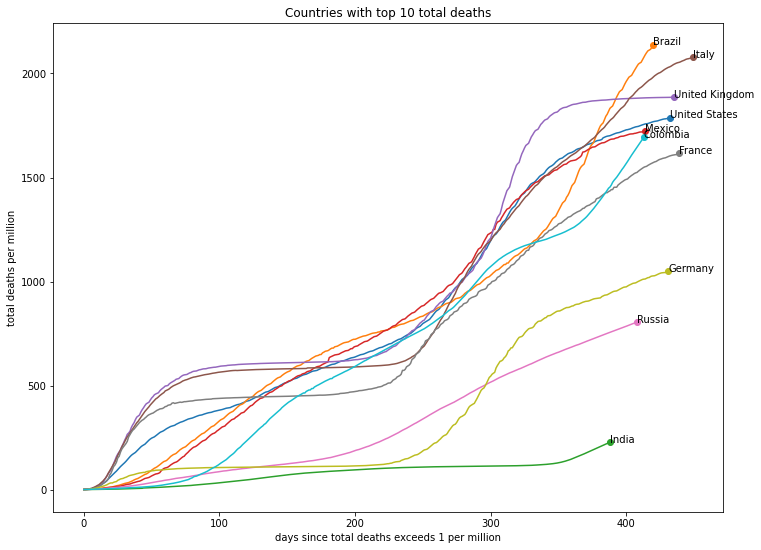

In [74]:
# 総死亡数および人口100万あたりの死亡数を取得
deaths = global_df["total_deaths"]
deaths_per_mil = global_df["total_deaths_per_million"]
# 総死亡数の上位10ヶ国のリストを取得し country_set に代入
rank = 10
country_set = deaths.groupby("location").last().sort_values(ascending=False).head(rank).index
print(country_set.to_list()) # 死亡数上位10ヶ国を表示

plt.figure(figsize=(12,9)) # 少し大きめの figure 領域を用意
# country_set内の各国について，100万人あたりの死亡数を，100万人あたり死亡数が1名を超えてからの経過日数に対してプロット
for country in country_set:
    ct_df = deaths_per_mil.loc[country] # 100万人あたりの死亡数を取得
    ct_df = ct_df[deaths_per_mil.loc[country]>1] # 100万人あたり死亡数が1を超えてからのデータに限定
    ct_df.index = (ct_df.index-ct_df.index[0]).days # 最初の日からの経過日数をインデックスにする
    plt.plot(ct_df) # 折れ線グラフでプロット
    x, y = ct_df.index[-1], ct_df.iloc[-1] # 折れ線グラフの最後の座標を取得
    plt.scatter(x, y) # 折れ線グラフの最後に●印を表示
    plt.annotate(country, xy=(x,y)) # 折れ線グラフ
plt.xlabel("days since total deaths exceeds 1 per million") # x軸ラベル
plt.ylabel("total deaths per million") # y軸ラベル
plt.title("Countries with top {} total deaths".format(rank)) # タイトル
# グラフを PDFおよび PNG 形式で保存
# bbox_inches='tight' というオプションを設定することで，軸ラベルが見切れてしまうのを防ぐ
plt.savefig('global_sample.pdf', bbox_inches='tight') # PDF形式で保存
plt.savefig('global_sample.png', bbox_inches='tight') # PNG形式で保存
# 画面表示 (plt.show()は plt.savefig より後に呼ぶこと． )
plt.show()